# The graph

In [2]:
import yaml
from anemoi.datasets import open_dataset
import anemoi.graphs.nodes as nodes
import anemoi.graphs.edges as edges
import anemoi.graphs.nodes.attributes as node_attributes
import anemoi.graphs.edges.attributes as edge_attributes
import os
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt

In [3]:
dataset_path = "datasets/keisler-era5-gs-weatherbench2-1p0d-1979-1979-3h-v0.zarr"

In [4]:
ds = open_dataset(dataset_path)

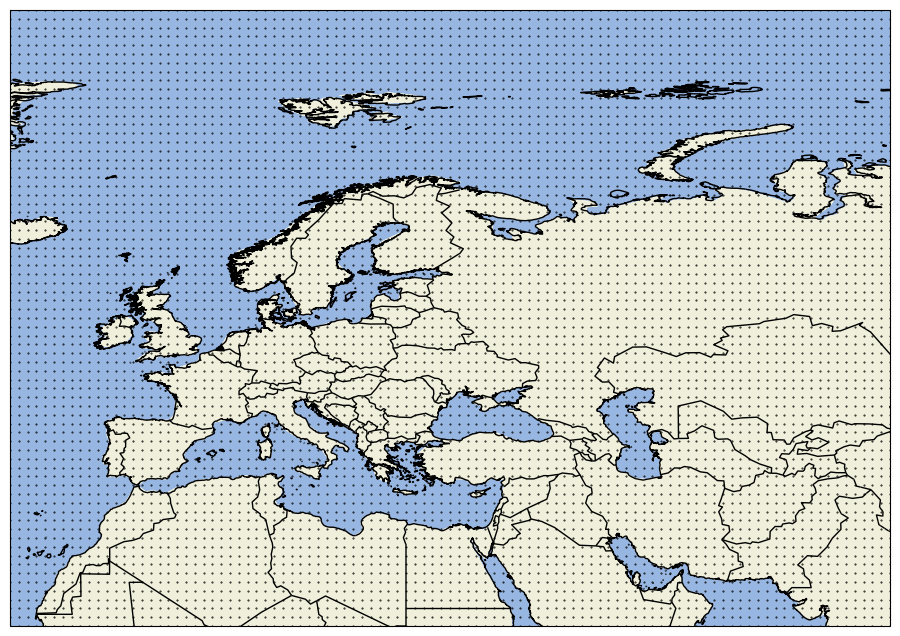

In [5]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection":ccrs.PlateCarree()}, figsize=(12,8))
ax.scatter(ds.longitudes, ds.latitudes, s=0.2, c="black")
ax.add_feature(cf.OCEAN)
ax.add_feature(cf.LAND)
ax.add_feature(cf.BORDERS)
ax.coastlines(resolution="10m")
ax.set_extent([-20,80,20,90])

In [6]:
from anemoi.graphs.generate.hex_icosahedron import create_hex_nodes

In [7]:
_, coords, ordering = create_hex_nodes(resolution=2)
coords = np.rad2deg(coords)

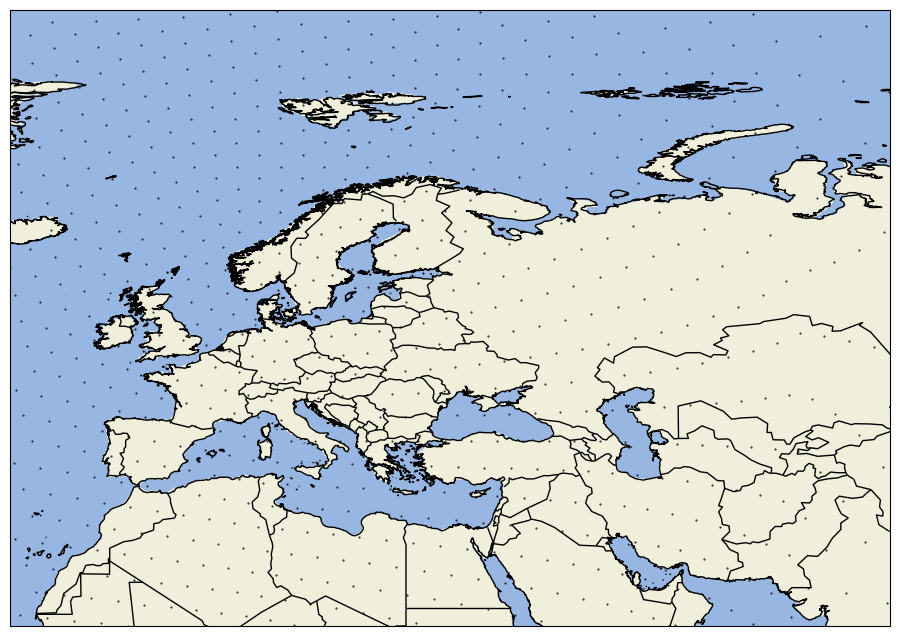

In [8]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection":ccrs.PlateCarree()}, figsize=(12,8))
ax.scatter(coords[:,0], coords[:,1], s=0.2, c="black")
ax.add_feature(cf.OCEAN)
ax.add_feature(cf.LAND)
ax.add_feature(cf.BORDERS)
ax.coastlines(resolution="10m")
ax.set_extent([-20,80,20,90])

(5.0, 51.5)


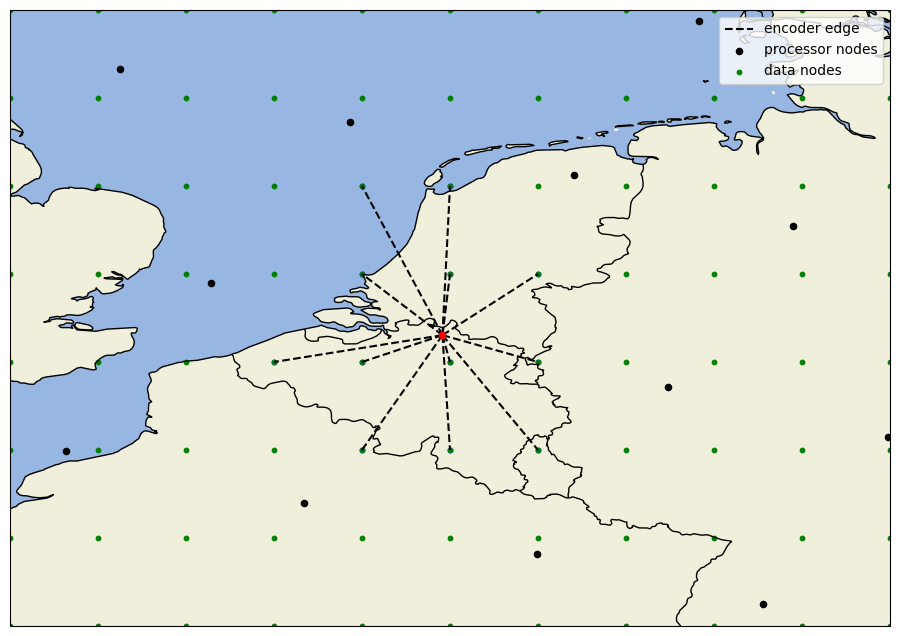

In [ ]:
extent = [0,10,48,55]
lon_mid = np.mean(extent[:2])
lat_mid = np.mean(extent[2:4])
i = np.argmin(np.sqrt((coords[:,0]-lon_mid)**2+(coords[:,1]-lat_mid)**2))
knn = np.argsort(np.sqrt((ds.longitudes-coords[i,0])**2+(ds.latitudes-coords[i,1])**2))[:12]

fig, ax = plt.subplots(1, 1, subplot_kw={"projection":ccrs.PlateCarree()}, figsize=(12,8))

for j in knn:
    if j == knn[0]:
        ax.plot([coords[i,0],ds.longitudes[j]], [coords[i,1], ds.latitudes[j]], c="black",ls="--",zorder=15,label="encoder edge")
    else:
        ax.plot([coords[i,0],ds.longitudes[j]], [coords[i,1], ds.latitudes[j]], c="black",ls="--",zorder=15)
    ax.scatter(ds.longitudes[j], ds.latitudes[j], s=10, c="blue")
ax.scatter(coords[:,0], coords[:,1], s=20, c="black",label="processor nodes")
ax.scatter(ds.longitudes, ds.latitudes, s=10, c="green", label="data nodes")
ax.scatter(coords[i,0],coords[i,1],s=20,c="red",zorder=20)
ax.add_feature(cf.OCEAN)
ax.add_feature(cf.LAND)
ax.add_feature(cf.BORDERS)
ax.coastlines()
ax.set_extent([0,10,48,55])
ax.legend()


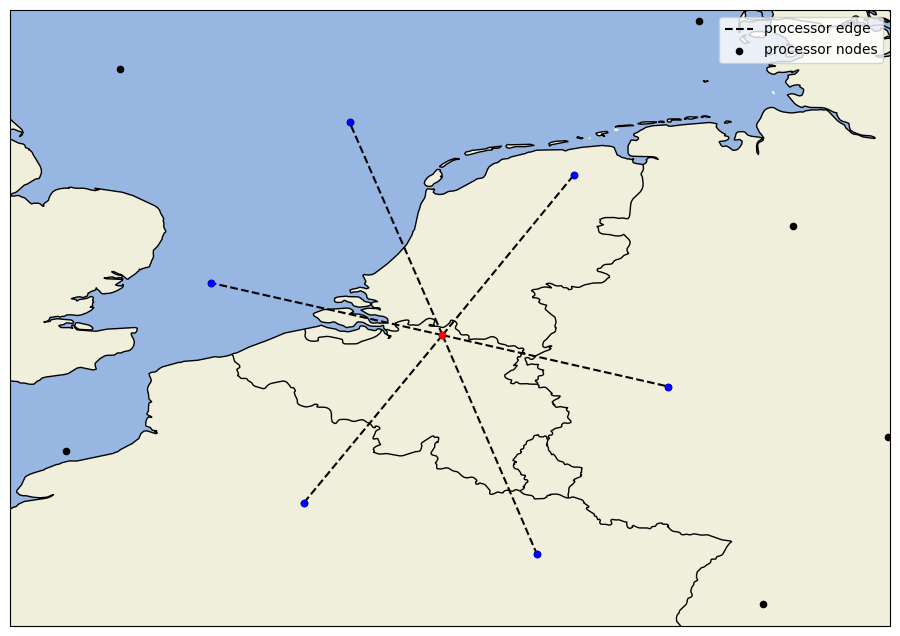

In [50]:
knn = np.argsort(np.sqrt((coords[:,0]-coords[i,0])**2+(coords[:,1]-coords[i,1])**2))[1:7]

fig, ax = plt.subplots(1, 1, subplot_kw={"projection":ccrs.PlateCarree()}, figsize=(12,8))

for j in knn:
    if j == knn[0]:
        ax.plot([coords[i,0], coords[j,0]], [coords[i,1], coords[j,1]], c="black",ls="--",zorder=15,label="processor edge")
    else:
        ax.plot([coords[i,0], coords[j,0]], [coords[i,1], coords[j,1]], c="black",ls="--",zorder=15)
    ax.scatter(coords[j,0], coords[j,1], s=20, c="blue",zorder=15)
ax.scatter(coords[:,0], coords[:,1], s=20, c="black",label="processor nodes")
#ax.scatter(ds.longitudes, ds.latitudes, s=10, c="green", label="data nodes")
ax.scatter(coords[i,0],coords[i,1],s=20,c="red",zorder=20)
ax.add_feature(cf.OCEAN)
ax.add_feature(cf.LAND)
ax.add_feature(cf.BORDERS)
ax.coastlines()
ax.set_extent([0,10,48,55])
ax.legend()


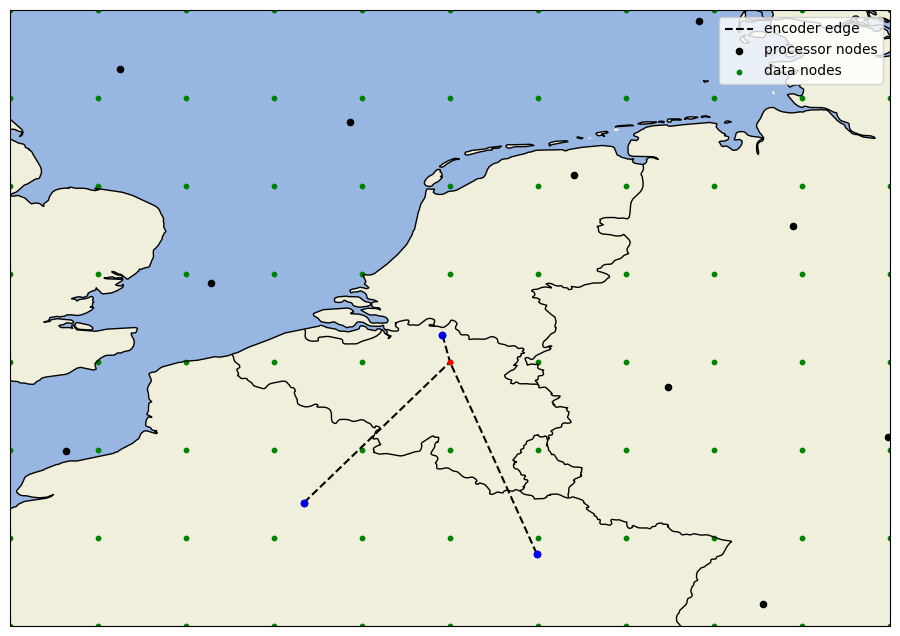

In [52]:
i = np.argmin(np.sqrt((ds.longitudes-lon_mid)**2+(ds.latitudes-lat_mid)**2))
knn = np.argsort(np.sqrt((ds.longitudes[i]-coords[:,0])**2+(ds.latitudes[i]-coords[:,1])**2))[:3]

fig, ax = plt.subplots(1, 1, subplot_kw={"projection":ccrs.PlateCarree()}, figsize=(12,8))

for j in knn:
    if j == knn[0]:
        ax.plot([coords[j,0],ds.longitudes[i]], [coords[j,1], ds.latitudes[i]], c="black",ls="--",zorder=15,label="encoder edge")
    else:
        ax.plot([coords[j,0],ds.longitudes[i]], [coords[j,1], ds.latitudes[i]], c="black",ls="--",zorder=15)
    ax.scatter(coords[j,0], coords[j,1], s=20, c="blue", zorder=15)
ax.scatter(coords[:,0], coords[:,1], s=20, c="black",label="processor nodes")
ax.scatter(ds.longitudes, ds.latitudes, s=10, c="green", label="data nodes")
ax.scatter(ds.longitudes[i], ds.latitudes[i],s=10,c="red",zorder=20)
ax.add_feature(cf.OCEAN)
ax.add_feature(cf.LAND)
ax.add_feature(cf.BORDERS)
ax.coastlines()
ax.set_extent([0,10,48,55])
ax.legend()

In [56]:
config_keys = [
    "nodes",
    "edges",
]
config = dict.fromkeys(config_keys)

In [4]:
config  

{'nodes': None, 'edges': None}

In [5]:
print("Possible node builders are:")
for builder in nodes.__all__:
    print(f"  - {builder}")


Possible node builders are:
  - AnemoiDatasetNodes
  - ZarrDatasetNodes
  - NPZFileNodes
  - TriNodes
  - HexNodes
  - HEALPixNodes
  - LatLonNodes
  - LimitedAreaHEALPixNodes
  - LimitedAreaNPZFileNodes
  - LimitedAreaTriNodes
  - LimitedAreaHexNodes
  - ReducedGaussianGridNodes
  - StretchedTriNodes
  - ICONMultimeshNodes
  - ICONCellGridNodes
  - ICONNodes
  - TextNodes
  - XArrayNodes


In [6]:
data_nodes = {
    "node_builder": {
        "_target_": "anemoi.graphs.nodes.AnemoiDatasetNodes",
        "dataset": dataset_path,
    },
}

processor_nodes = {
    "node_builder": {
        "_target_": "anemoi.graphs.nodes.HexNodes",
        "resolution": 2,
    }
}


In [7]:
print("Possible edge builders are:")
for builder in edges.__all__:
    print(f"  - {builder}")

Possible edge builders are:
  - KNNEdges
  - CutOffEdges
  - MultiScaleEdges
  - ReversedCutOffEdges
  - ReversedKNNEdges
  - ICONTopologicalProcessorEdges
  - ICONTopologicalEncoderEdges
  - ICONTopologicalDecoderEdges


In [8]:
encoder = {
    "source_name": "data",
    "target_name": "processor",
    "edge_builder": {
        "_target_": "anemoi.graphs.edges.KNNEdges",
        "num_nearest_neighbours": 12,
    }
}

processor = {
    "source_name": "processor",
    "target_name": "processor",
    "edge_builder": {
        "_target_": "anemoi.graphs.edges.KNNEdges",
        "num_nearest_neighbours": 6,        
    }
}

decoder = {
    "source_name": "processor",
    "target_name": "data",
    "edge_builder": {
        "_target_": "anemoi.graphs.edges.KNNEdges",
        "num_nearest_neighbours": 3
    }
}

In [9]:
print("Available node attributes are:")
for attr in node_attributes.__all__:
    print(f"  - {attr}")

print("Available edge attributes are:")
# for attr in edge_attributes:
#     print(f"  - {attr}")

Available node attributes are:
  - GridsMask
  - SphericalAreaWeights
  - PlanarAreaWeights
  - UniformWeights
  - CutOutMask
  - MaskedPlanarAreaWeights
  - NonmissingAnemoiDatasetVariable
  - BooleanAndMask
  - BooleanNot
  - BooleanOrMask
  - CosineLatWeightedAttribute
  - IsolatitudeAreaWeights
Available edge attributes are:


In [10]:
edge_length = {"_target_": "anemoi.graphs.edges.attributes.EdgeLength"}
edge_direction = {"_target_": "anemoi.graphs.edges.attributes.EdgeDirection"}


In [11]:
encoder["attributes"] = {
    "edge_length": edge_length,
    "edge_direction": edge_direction
}
processor["attributes"] = {
    "edge_length": edge_length,
    "edge_direction": edge_direction
}
decoder["attributes"] = {
    "edge_length": edge_length,
    "edge_direction": edge_direction
}





In [12]:
encoder

{'source_name': 'data',
 'target_name': 'processor',
 'edge_builder': {'_target_': 'anemoi.graphs.edges.KNNEdges',
  'num_nearest_neighbours': 12},
 'attributes': {'edge_length': {'_target_': 'anemoi.graphs.edges.attributes.EdgeLength'},
  'edge_direction': {'_target_': 'anemoi.graphs.edges.attributes.EdgeDirection'}}}

In [13]:
config["nodes"] = {
    "data": data_nodes,
    "processor": processor_nodes
}

config["edges"] = [
    encoder,
    processor,
    decoder
]

In [14]:
print(
    yaml.dump(
        config,
        default_flow_style=False,
        sort_keys=False
    )
)

nodes:
  data:
    node_builder:
      _target_: anemoi.graphs.nodes.AnemoiDatasetNodes
      dataset: datasets/keisler-era5-gs-weatherbench2-1p0d-1979-1979-3h-v0.zarr
  processor:
    node_builder:
      _target_: anemoi.graphs.nodes.HexNodes
      resolution: 2
edges:
- source_name: data
  target_name: processor
  edge_builder:
    _target_: anemoi.graphs.edges.KNNEdges
    num_nearest_neighbours: 12
  attributes:
    edge_length: &id001
      _target_: anemoi.graphs.edges.attributes.EdgeLength
    edge_direction: &id002
      _target_: anemoi.graphs.edges.attributes.EdgeDirection
- source_name: processor
  target_name: processor
  edge_builder:
    _target_: anemoi.graphs.edges.KNNEdges
    num_nearest_neighbours: 6
  attributes:
    edge_length: *id001
    edge_direction: *id002
- source_name: processor
  target_name: data
  edge_builder:
    _target_: anemoi.graphs.edges.KNNEdges
    num_nearest_neighbours: 3
  attributes:
    edge_length: *id001
    edge_direction: *id002



In [15]:
config_dir = "./configs"
config_path = os.path.join(config_dir,"graph.yaml")
with open(config_path, 'w') as file:
    yaml.dump(config, file, default_flow_style=False, sort_keys=False)

In [55]:
graph_dir = "./graphs"
os.makedirs(graph_dir, exist_ok=True)
graph_path = os.path.join(graph_dir, "keisler_graph.pt")

In [19]:
!anemoi-graphs create --overwrite {config_path} {graph_path}

2025-10-07 11:02:38 INFO Reading the dataset from datasets/keisler-era5-gs-weatherbench2-1p0d-1979-1979-3h-v0.zarr.
2025-10-07 11:02:38 INFO Using KNN-Edges (with 12 nearest neighbours) between data and processor.
2025-10-07 11:02:38 WARNING The 'torch-cluster' library is not installed. Installing 'torch-cluster' can significantly improve performance for graph creation. You can install it using 'pip install torch-cluster'.
2025-10-07 11:02:39 INFO Using KNN-Edges (with 6 nearest neighbours) between processor and processor.
2025-10-07 11:02:39 WARNING The 'torch-cluster' library is not installed. Installing 'torch-cluster' can significantly improve performance for graph creation. You can install it using 'pip install torch-cluster'.
2025-10-07 11:02:39 INFO Using KNN-Edges (with 3 nearest neighbours) between processor and data.
2025-10-07 11:02:39 WARNING The 'torch-cluster' library is not installed. Installing 'torch-cluster' can significantly improve performance for graph creation. Yo

In [20]:
!anemoi-graphs inspect {graph_path} {graph_dir}


📦 Path       : ./graphs/keisler_graph.pt
💽 Size       : 6.3 MiB (6595456)

🪩  Nodes summary

   Nodes name │ Num. nodes │ Attributes │ Attribute dim │ Min. latitude │ Max. latitude │ Min. longitude │ Max. longitude
   ───────────┼────────────┼────────────┼───────────────┼───────────────┼───────────────┼────────────────┼───────────────
   data       │      65160 │            │             0 │           -90 │            90 │              0 │            359
   processor  │       5882 │            │             0 │      -89.2415 │       89.2415 │       -179.975 │        179.939
   ───────────┴────────────┴────────────┴───────────────┴───────────────┴───────────────┴────────────────┴───────────────


🌐  Edges summary

   Source    │ Target    │ Num. edges │ Isolated Source │ Isolated Target │ Attribute dim │                          Attributes
   ──────────┼───────────┼────────────┼─────────────────┼─────────────────┼───────────────┼────────────────────────────────────
   data      │ proce

In [53]:
import torch

In [ ]:
graph = torch.load(graph_path, weights_only=False)


{'x': tensor([[-1.5708,  0.0000],
        [-1.5533,  0.0000],
        [-1.5359,  0.0000],
        ...,
        [ 1.5359,  6.2657],
        [ 1.5533,  6.2657],
        [ 1.5708,  6.2657]]), 'node_type': 'AnemoiDatasetNodes'}

In [84]:
graph

HeteroData(
  data={
    x=[65160, 2],
    node_type='AnemoiDatasetNodes',
  },
  processor={
    x=[5882, 2],
    node_type='HexNodes',
  },
  (data, to, processor)={
    edge_index=[2, 70584],
    edge_type='KNNEdges',
    edge_length=[70584, 1],
    edge_direction=[70584, 2],
  },
  (processor, to, processor)={
    edge_index=[2, 35292],
    edge_type='KNNEdges',
    edge_length=[35292, 1],
    edge_direction=[35292, 2],
  },
  (processor, to, data)={
    edge_index=[2, 195480],
    edge_type='KNNEdges',
    edge_length=[195480, 1],
    edge_direction=[195480, 2],
  }
)

In [ ]:
graph[("data","to","processor")]["edge_length"][0][0].tolist()

AttributeError: 'float' object has no attribute 'astype'

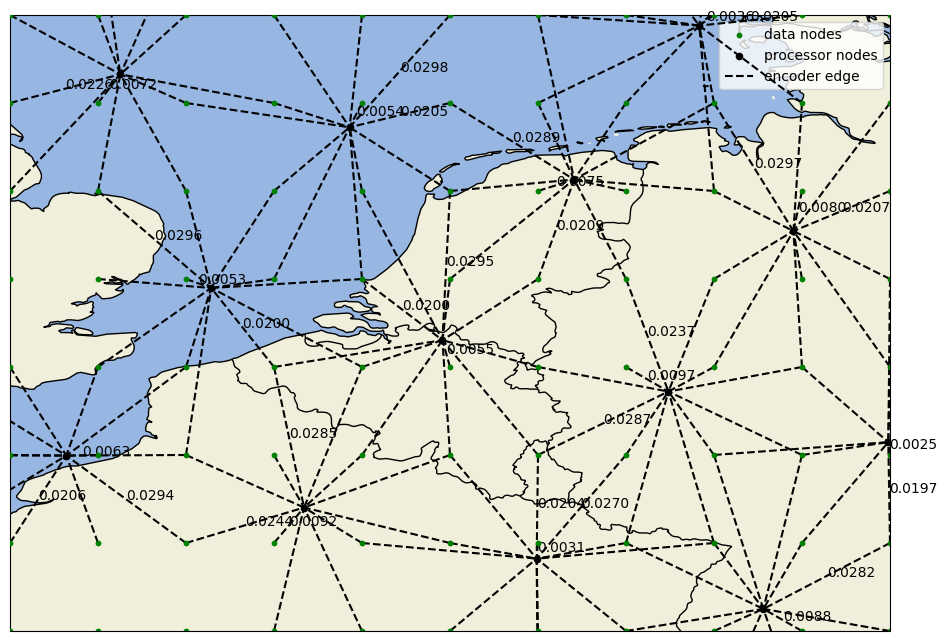

In [101]:

fig, ax = plt.subplots(1, 1, subplot_kw={"projection":ccrs.PlateCarree()}, figsize=(12,8))

ax.scatter(np.rad2deg(graph["data"]["x"][:,0]), np.rad2deg(graph["data"]["x"][:,1]), s=10, c="green",label="data nodes", zorder=20)
ax.scatter(np.rad2deg(graph["processor"]["x"][:,0]), np.rad2deg(graph["processor"]["x"][:,1]), s=20, c="black", label="processor nodes", zorder=20)
encoder_edges = graph[("data","to","processor")]["edge_index"]
cnt = 0
for i in range(encoder_edges.shape[1]):

    i_data = encoder_edges[0,i]
    i_processor = encoder_edges[1,i]
    lon_data, lat_data = (np.rad2deg(graph["data"]["x"][i_data,:]) + 180) % 360 -180
    lon_proc, lat_proc = (np.rad2deg(graph["processor"]["x"][i_processor,:]) + 180) %360 - 180
    lon_text, lat_text = (np.mean([lon_data,lon_proc]), np.mean([lat_data, lat_proc]))
    if lon_proc > 0 and lon_proc < 10 and lat_proc > 48 and lat_proc < 55:                                 
        im = ax.plot(
            [lon_data, lon_proc],
            [lat_data, lat_proc],
            c="black",
            ls="--",
            zorder=15
        )
        if cnt % 4 == 0 and lon_text > 0 and lon_text < 10 and lat_text > 48 and lat_text < 55:
            ax.text(x=lon_text,y=lat_text,s=f"{graph[("data","to","processor")]["edge_length"][i][0]:.4f}")
        cnt += 1
im[0].set_label("encoder edge")
ax.add_feature(cf.OCEAN)
ax.add_feature(cf.LAND)
ax.add_feature(cf.BORDERS)
ax.coastlines()
ax.set_extent([0,10,48,55])
ax.legend(loc="upper right")